In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../')
import utils
import calibration_utils as calibration
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import pandas as pd

cot = {
'4': [49.17608899,50.57288328,57.8519985,45.20916829,49.54712304,49.12787645,51.89981393,56.80393354,46.07572655,49.9137551,48.56039076,49.72959306,54.98117398,46.15358213,49.36397374,46.26247503,47.47363022,54.38686236,41.50386444,45.5660581,49.32094888],
'6': [45.82783875,44.42426425,42.35472864,41.53335094,44.29064126,45.0563287,50.56927468,43.76178505,37.06325305,39.18306916,42.91059321,43.48467375,41.31915515,40.95958471,47.20640713,42.64316045,41.0975532,39.01013972],
'8': [40.54313391,38.79126308,37.27382052,39.74838627,37.65792804,44.60771101,44.30899038,41.17856843,45.39741094,34.68042074,47.04520699,43.29785419,39.31088664,41.29022764,38.13669769,42.34122061,43.485102],
'10': [58.51767604,43.37938763,38.73978775,52.28310617,47.71445731,51.18189416,42.42874102,41.99477099,51.58631389,52.12246724,54.61335796,45.44339903,42.87221016,52.62136139,44.05041896],
'free': [46.66940046,44.56659416,42.74373839,45.20260534,43.37389745,47.94368149,50.21013573,44.04949914,44.52912012,42.78161788,44.5379339]
    }

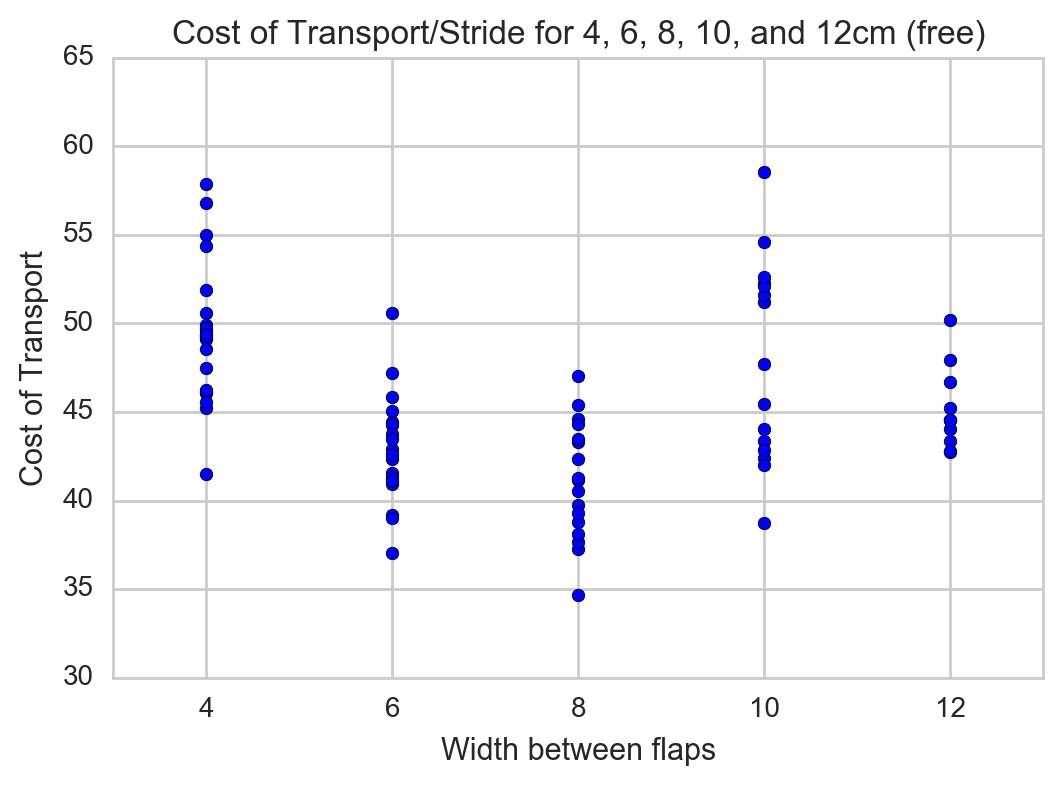

In [10]:
plt.title("Cost of Transport/Stride for 4, 6, 8, 10, and 12cm (free)")
plt.ylabel("Cost of Transport")
plt.xlabel("Width between flaps")
plt.scatter([4]*len(cot['4']), cot['4'])
plt.scatter([6]*len(cot['6']), cot['6'])
plt.scatter([8]*len(cot['8']), cot['8'])
plt.scatter([10]*len(cot['10']), cot['10'])
plt.scatter([12]*len(cot['free']), cot['free'])

